In [1]:
import numpy as np
import scipy
import scipy.sparse as sparse
import cvxpy as cp
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
N = 3
A = np.eye(N)
Y = np.block([[A@A.conj().T, A],[A.conj().T, np.eye(N)]])
rand_mat = np.random.random((N, N))
E_ij = np.zeros((N, N))
E_ijs = []
kron_delta = []
for i in range(N):
    for j in range(N):
        E_ij_copy = E_ij.copy()
        E_ij_copy[i, j] = 1
        E_ijs.append(E_ij_copy)
        if i == j:
            kron_delta.append(2)
        else:
            kron_delta.append(0)

In [15]:
A_i = []
E_s = []
for i in range(len(E_ijs)):
    A_i.append(np.block([[np.zeros((N, N)), 0.5*E_ijs[i]],[0.5*E_ijs[i].conj().T, -(0.5/N)*np.trace(E_ijs[i]@rand_mat + (E_ijs[i]@rand_mat).conj().T)*np.eye(N)]]))
    E_s.append(np.block([[np.zeros((N, N)), np.zeros((N, N))],[np.zeros((N, N)), E_ijs[i] + E_ijs[i].conj().T]]))
pos_semi_def_A = [(E_ijs[i] + E_ijs[i].conj().T)/2 for i in range(len(E_ijs)//2)]
pos_semi_def_A_full = [np.block([[pos_semi_def_A[i], np.zeros((N, N))],[np.zeros((N, N)), np.zeros((N, N))]]) for i in range(len(pos_semi_def_A))]

In [16]:
obj_mat = np.block([[np.eye(N), np.zeros((N, N))],[np.zeros((N, N)), np.zeros((N, N))]])
constraints_list =  A_i + E_s

In [17]:
X = cp.Variable(shape = (2*N, 2*N), symmetric = True)
constraints = [X >> 0]
#constraints += [cp.trace(pos_semi_def_A_full[i]@X) >= 0 for i in range(len(pos_semi_def_A_full))]
constraints += [cp.trace(A_i[i]@X) == 0 for i in range(len(A_i))]
constraints += [cp.trace(E_s[i]@X) == kron_delta[i] for i in range(len(E_s))]
problem = cp.Problem(cp.Minimize(cp.trace(obj_mat@X)), constraints)

In [18]:
problem.solve(verbose = True)

                                     CVXPY                                     
                                     v1.4.2                                    
(CVXPY) Feb 09 10:15:16 AM: Your problem has 36 variables, 19 constraints, and 0 parameters.
(CVXPY) Feb 09 10:15:16 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Feb 09 10:15:16 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 09 10:15:16 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 09 10:15:16 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Feb 09 10:15:16 AM: Compiling problem (target solver=SCS).
(CVX

3.9849582273733892

In [19]:
np_X = np.array(X.value)

In [20]:
rand_mat, np_X[:N, N:2*N]

(array([[0.5488135 , 0.71518937, 0.60276338],
        [0.54488318, 0.4236548 , 0.64589411],
        [0.43758721, 0.891773  , 0.96366276]]),
 array([[0.5488135 , 0.54488318, 0.43758721],
        [0.71518937, 0.4236548 , 0.891773  ],
        [0.60276338, 0.64589411, 0.96366276]]))

In [9]:
# Violate the first 2 constraints??
[np.trace(constraints_list[i]@np_X) for i in range(len(constraints_list))]

[-8.441586318852501e-11,
 -1.4178835883171814e-10,
 1.3496934125889481e-10,
 -6.613207204075877e-11,
 1.1764836327365913e-10,
 -6.773570593310296e-11,
 8.319184230387577e-11,
 -4.648792462091933e-11,
 -7.60561058577025e-11,
 2.0000000004846683,
 3.811023557585769e-10,
 5.814226843589389e-10,
 3.811023557585769e-10,
 2.0000000003496594,
 5.112417760338373e-10,
 5.814226843589389e-10,
 5.112417760338373e-10,
 2.0000000007573178]

In [10]:
# With one matrix, matrix equality gives exactly same... what if we vectorize everything?
np.trace(rand_mat.conj().T@rand_mat)

1.4729134625112863

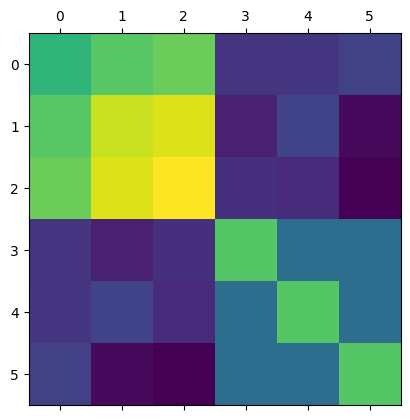

In [12]:
plt.matshow(X.value)

In [30]:
X.value

array([[ 9.99998998e-01,  1.10094678e-14, -1.34787299e-14, ...,
         2.41753524e-18,  5.17970047e-18,  9.19469961e-19],
       [ 1.10094678e-14,  9.99998998e-01, -2.21089032e-14, ...,
         6.10600252e-18,  1.20183720e-17,  1.64912719e-17],
       [-1.34787299e-14, -2.21089032e-14,  9.99998998e-01, ...,
         6.10829414e-18,  4.52540051e-18, -2.46829516e-18],
       ...,
       [ 2.41753496e-18,  6.10600314e-18,  6.10829475e-18, ...,
         1.00000000e+00,  1.10536850e-18,  7.92343095e-18],
       [ 5.17970108e-18,  1.20183721e-17,  4.52540075e-18, ...,
         1.10536830e-18,  1.00000000e+00,  2.53023988e-18],
       [ 9.19469723e-19,  1.64912724e-17, -2.46829477e-18, ...,
         7.92343121e-18,  2.53023980e-18,  1.00000000e+00]])